In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('titanic.csv')
display(df.head(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'],axis=1)



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [3]:
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]


In [4]:
df['Sex'] = df['Sex'].map({'female':0, 'male':1})

In [5]:
df['Sex'] = pd.to_numeric(df['Sex'])

In [6]:
display(df.head(5))

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,0


In [7]:
display(df.dtypes)

Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Survived      int64
dtype: object

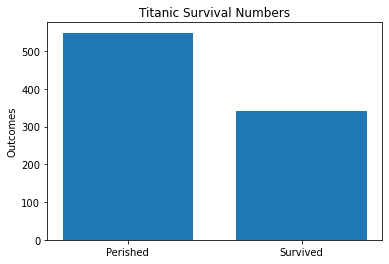

In [8]:
counts = df['Survived'].value_counts()

plt.bar(x=[0,.4], height = counts, width = .3)
plt.xticks([0,.4], ("Perished", "Survived"))
plt.ylabel('Outcomes')
plt.title('Titanic Survival Numbers')
plt.show()

In [9]:
pclassMean = df["Pclass"].mean()
sexMean = df["Sex"].mean()
ageMean = df["Age"].mean()
sibspMean = df["SibSp"].mean()
parchMean = df["Parch"].mean()
fareMean = df["Fare"].mean()
survivedMean = df['Survived'].mean()
print("Pclass mean = %s " % (pclassMean))
print("Sex mean = %s " % (sexMean))
print("Age mean = %s " % (ageMean))
print("SibSp mean = %s " % (sibspMean))
print("Parch mean = %s " % (parchMean))
print("Fare mean = %s " % (fareMean))
print("Survived mean = %s " % (survivedMean))

Pclass mean = 2.308641975308642 
Sex mean = 0.6475869809203143 
Age mean = 29.69911764705882 
SibSp mean = 0.5230078563411896 
Parch mean = 0.38159371492704824 
Fare mean = 32.2042079685746 
Survived mean = 0.3838383838383838 


In [10]:
display(df.groupby(['Survived']).mean())

,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,,,,,,
0,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887
1,1.950292,0.318713,28.343690,0.473684,0.464912,48.395408


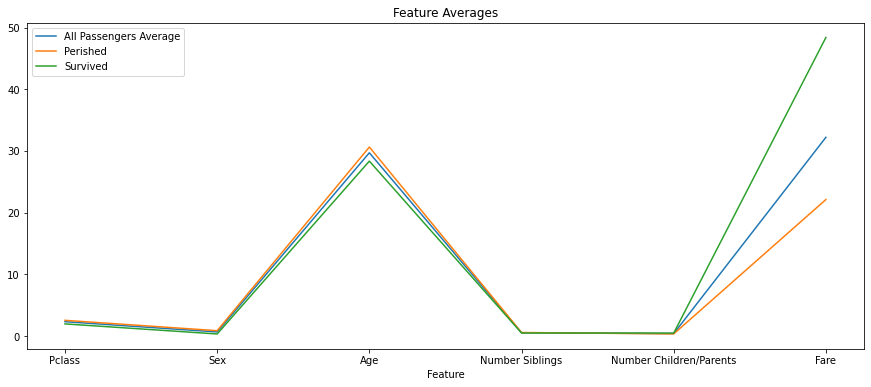

In [11]:
totalAvg = np.array(df.mean())
totalAvg = np.delete(totalAvg, 6, 0)
perishedAvg = np.array(df.groupby('Survived').mean())
perishedAvg = np.delete(perishedAvg, 1, 0)
perishedAvg = perishedAvg.flatten()
survivedAvg = np.array(df.groupby('Survived').mean())
survivedAvg = np.delete(survivedAvg, 0, 0)
survivedAvg = survivedAvg.flatten()
df2 = pd.DataFrame({
            'Feature':['Pclass', 'Sex', 'Age', 'Number Siblings', 'Number Children/Parents', 'Fare'],
            'All Passengers Average': totalAvg,
            'Perished': perishedAvg,
            'Survived': survivedAvg
})
ax = plt.gca()
df2.plot(title = "Feature Averages", kind = 'line', x = 'Feature', y = 'All Passengers Average',
             yticks = (0,10,20,30,40,50), figsize=(15,6), ax=ax)
df2.plot(kind = 'line', x = 'Feature', y = 'Perished', ax=ax)
df2.plot(kind = 'line', x = 'Feature', y = 'Survived', ax=ax)
plt.ylabel=('Average')
plt.legend()
plt.show()

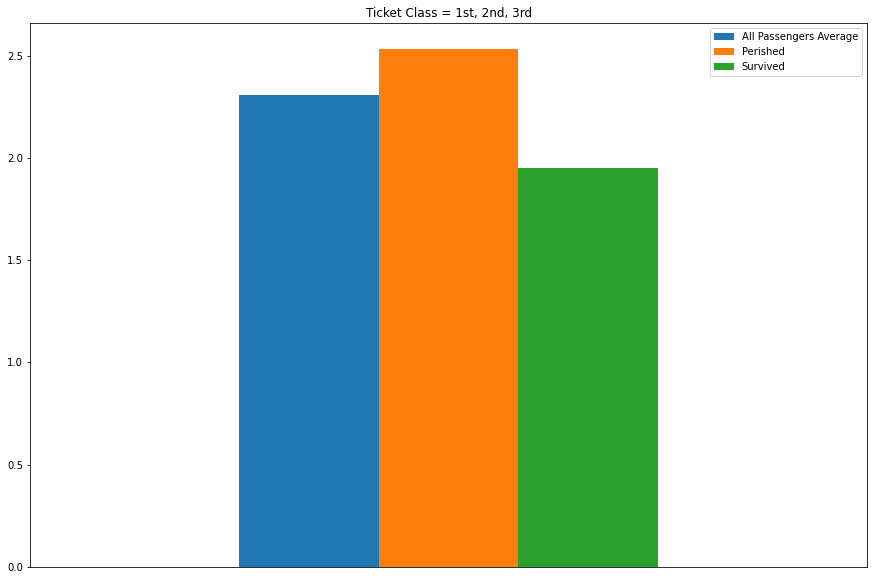

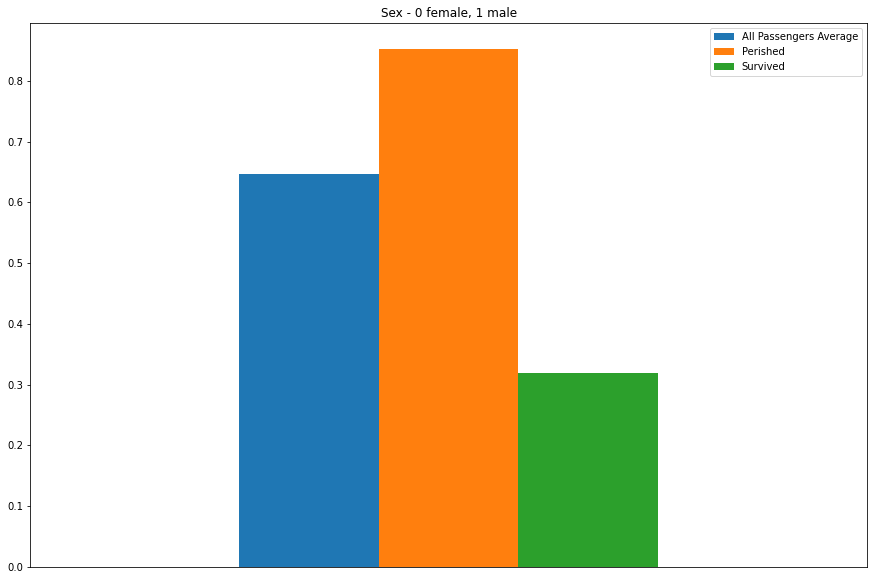

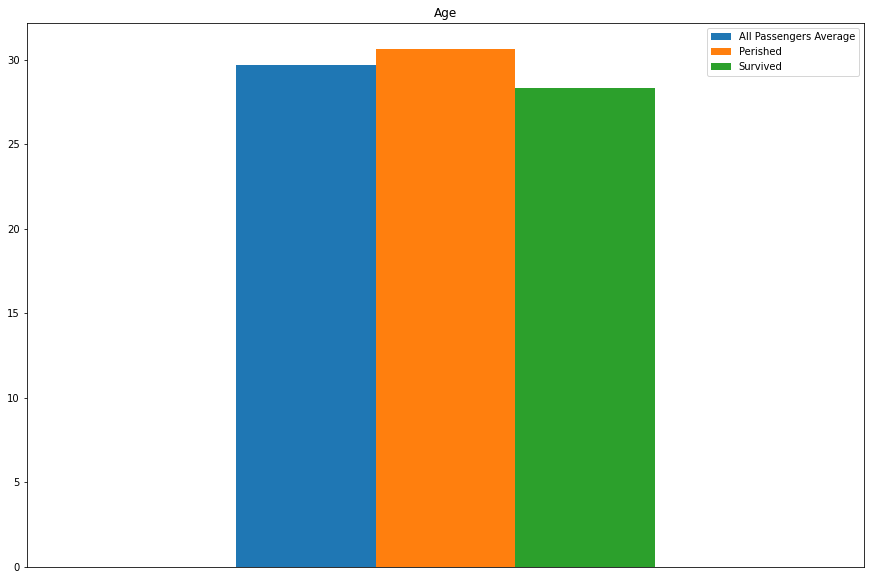

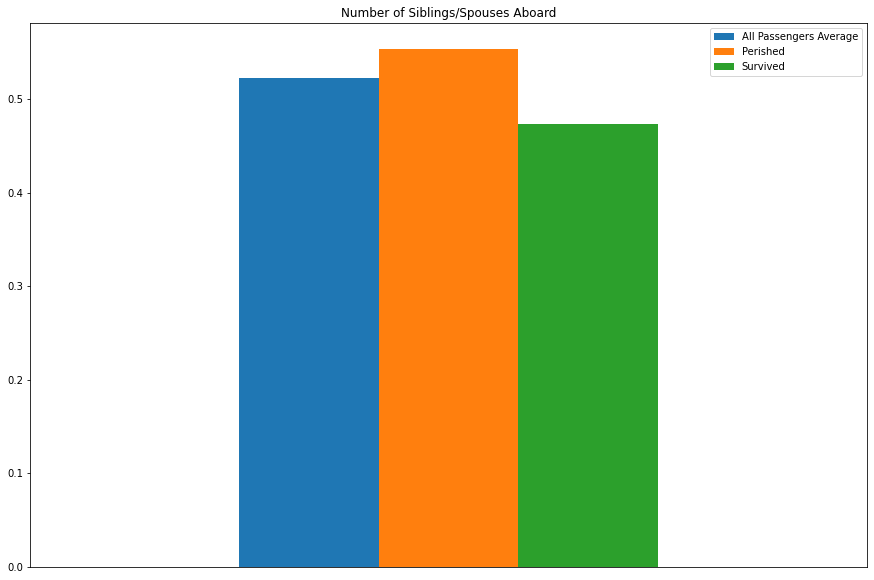

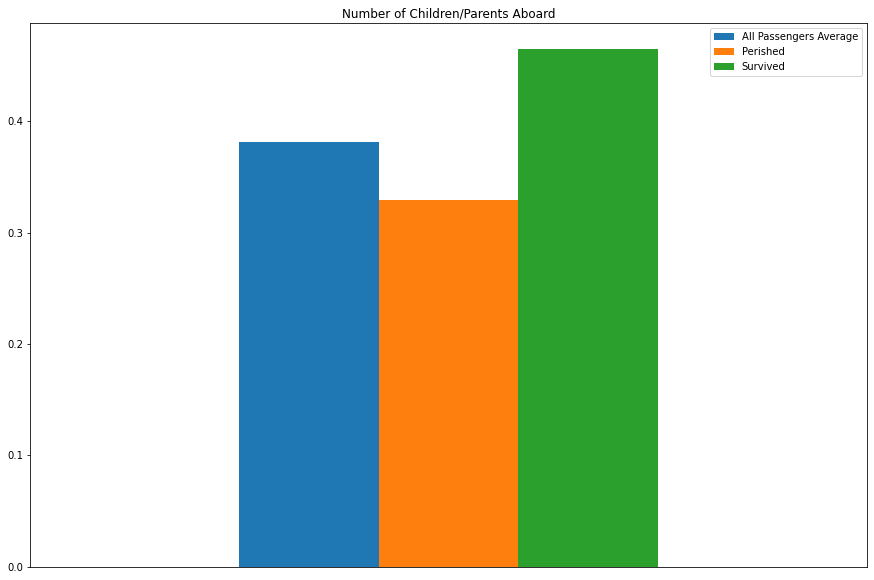

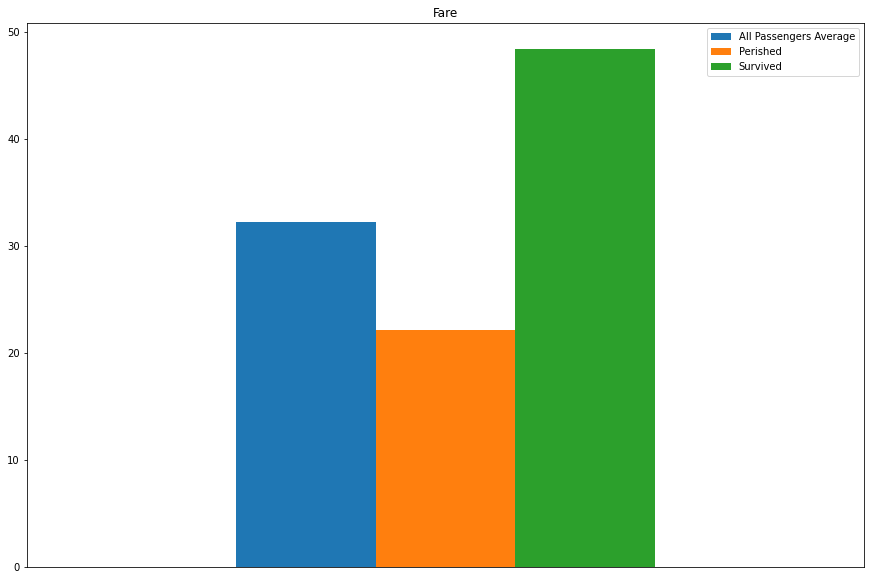

In [12]:
df3 = df2.iloc[[0]]
df3.plot.bar(title="Ticket Class = 1st, 2nd, 3rd", xticks=(), width=.5, figsize = (15,10))
plt.show()
df3 = df2.iloc[[1]]
df3.plot.bar(title="Sex - 0 female, 1 male", xticks=(), width=.5, figsize = (15,10))
plt.show()
df3 = df2.iloc[[2]]
df3.plot.bar(title="Age", xticks=(), width=.5, figsize = (15,10))
plt.show()
df3 = df2.iloc[[3]]
df3.plot.bar(title="Number of Siblings/Spouses Aboard", xticks=(), width=.5, figsize = (15,10))
plt.show()
df3 = df2.iloc[[4]]
df3.plot.bar(title="Number of Children/Parents Aboard", xticks=(), width=.5, figsize = (15,10))
plt.show()
df3 = df2.iloc[[5]]
df3.plot.bar(title="Fare", xticks=(), width=.5, figsize = (15,10))
plt.show()







In [13]:
display(df.corr()['Survived'])

Pclass     -0.338481
Sex        -0.543351
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Survived    1.000000
Name: Survived, dtype: float64

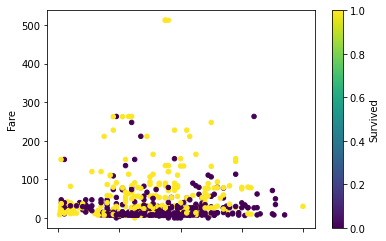

In [14]:
#display(df.plot.scatter(x='Age', y='Fare', c='Survived', colormap = 'viridis'))
df.plot.scatter(x='Age', y='Fare', c='Survived', colormap = 'viridis')
plt.show()